In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/till/projects/night-drive/datasets/bdd/BDDDataSets')
import BDDDataSets as bdd
import pdb

import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

### Load data

In [2]:
# Actually can use this to load all data with indicated plit
cfg_file = '../../config_bdd_setA.json'
cfg = bdd.GetConfig(cfg_file)
ds_A = bdd.NightDriveDataset(cfg, split='all')
cfg_file = '../../config_bdd_setB.json'
cfg = bdd.GetConfig(cfg_file)
ds_B = bdd.NightDriveDataset(cfg, split='all')
cfg_file = '../../config_bdd_setC.json'
cfg = bdd.GetConfig(cfg_file)
ds_C = bdd.NightDriveDataset(cfg, split='all')

>> Loading BDD training label dataset
>> Loading BDD validation label dataset
weather    clear  cloudy  rainy  snowy
timeofday                             
daytime     2879    2194      0      0
night      24563      44   2341   2368
                     clear  cloudy  rainy  snowy
split     timeofday                             
test      daytime      419     397     86     96
          night        797      50     76     76
valid     daytime      419     397     86     96
          night        797      50     76     76
train_dev daytime      500     500    130    147
          night          0       0      0      0
train     daytime    10000   10000   2615   2943
          night          0       0      0      0

Multi-variate distribution of unique original samples for each split:

                     clear  cloudy  rainy  snowy  total
split     timeofday                                    
test      daytime      419     397     86     96    998
          night        797      50  

In [4]:
# some clean up
ds_A = ds_A.data.copy().drop(columns=['labels'])
ds_B = ds_B.data.copy().drop(columns=['labels'])
ds_C = ds_B.data.copy().drop(columns=['labels'])

AttributeError: 'DataFrame' object has no attribute 'data'

In [22]:
ds_A.query('(split =="test")').weather.unique()
ds_A.split.value_counts()

unassigned    55228
train         10000
Name: split, dtype: int64

In [57]:
# plotly plots
x = ds_A.query('(timeofday =="night") & (split =="train")').weather.unique()
y0 = ds_A.query('(timeofday =="daytime") & (split =="train")').weather.value_counts()
y1 = ds_A.query('(timeofday =="night") & (split =="train")').weather.value_counts()

trace0 = go.Bar(
    name = "daytime",
    x = x,
    y = y0,
    text=y0,
    textposition = 'auto',
    opacity = 0.6,
)
trace1 = go.Bar(
    name = "night",
    x = x,
    y = y1,
    text=y1,
    textposition = 'auto',
    opacity = 0.6,
)
data = [trace0, trace1]

layout = go.Layout(
    title= "<b>Train set C class distributions</b>",
        titlefont = dict(
            size=26,
            color='black',
        ),
    yaxis = dict(
        title = '<b>Image count (-)</b>',
        titlefont = dict(
            size=18,
            color='black',
        )
    )
)

fig = go.Figure(data=data, layout=layout)

# display in notebook
py.offline.iplot(fig)

# create HTML and open in browser, store HTML
py.offline.plot(fig, filename='simple_dashboard.html')

'file:///home/till/projects/night-drive/datasets/bdd/simple_dashboard.html'

In [58]:
# Generate the HTML code of the plot in a <div> element:

config = dict(
    modeBarButtonsToRemove=['sendDataToCloud'],
    displaylogo=False,
    fillFrame=True,
)  

div_str = py.offline.plot(
    fig,
    output_type='div',
    include_plotlyjs=False,
    show_link=False,
    config=config,
)

In [59]:
# Build a web page to include the <div> element of the plot:
html_str = '''<!DOCTYPE html>
                <html>
                
                <head>
                  <script src="https://d3js.org/d3.v3.min.js"></script>
                  <script src='https://cdn.plot.ly/plotly-latest.min.js'></script>
                </head>
                
                
                <body>
                  <h1>Simple Dashboard</h1>
                  <p>The following plot is static and interactive at the same time ;)</p>
                
                  {}
                
                </body>
                
                </html>
                '''.format(div_str)


# The resulting string can be saved in a file
with open('simple_dashboard.html', 'w') as f:
    f.write(html_str)

### Plot class distributions

<BarContainer object of 4 artists>

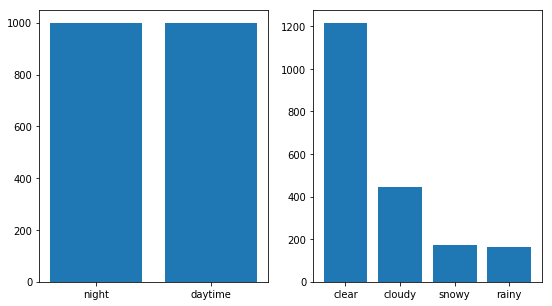

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(9,5))
ax[0].bar(ds_test_C.data.timeofday.unique(), ds_test_C.data.timeofday.value_counts())
ax[1].bar(ds_test_C.data.weather.unique(), ds_test_C.data.weather.value_counts())
ax[1].bar2

In [ ]:
# nested pie chart
# https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py